In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
!pip install scipy

In [ ]:
!pip install glob2

##CAPSTON - 1
CLASSIFICATION

In [11]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob

In [12]:

# Define the image shape
IMAGESHAPE = (224, 224, 3)

training_data = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train'
testing_data = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/test'


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
train_normal_dir = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/Normal'
train_pneumonia_dir = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/Pneumonia'

train_normal_files = [os.path.join(train_normal_dir, f) for f in os.listdir(train_normal_dir)]
train_pneumonia_files = [os.path.join(train_pneumonia_dir, f) for f in os.listdir(train_pneumonia_dir)]

train_data = pd.DataFrame({
    'File': train_normal_files + train_pneumonia_files,
    'Label': ['Normal'] * len(train_normal_files) + ['Pneumonia'] * len(train_pneumonia_files)
})

# Display basic statistics
print("Basic Statistics:")
print(train_data.describe())

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize sample images
sample_images = train_data.sample(n=9, random_state=42)
plt.figure(figsize=(10, 10))
for i, row in enumerate(sample_images.itertuples()):
    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread(row.File), cmap='gray')
    plt.title(row.Label)
    plt.axis('off')
plt.suptitle('Sample Images')
plt.show()

# Visualize image dimensions
image_dimensions = pd.DataFrame([(plt.imread(file).shape[0], plt.imread(file).shape[1]) for file in train_data['File']],
                                columns=['Height', 'Width'])
plt.figure(figsize=(10, 5))
sns.histplot(data=image_dimensions, x='Height', bins=20, kde=True, color='blue', alpha=0.5)
sns.histplot(data=image_dimensions, x='Width', bins=20, kde=True, color='orange', alpha=0.5)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Count')
plt.legend(['Height', 'Width'])
plt.show()

# Visualize correlation between image dimensions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=image_dimensions, x='Height', y='Width', alpha=0.5)
plt.title('Correlation between Image Dimensions')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

# Generate an interactive histogram using Plotly
fig = px.histogram(image_dimensions, x='Height', nbins=50, title='Histogram of Image Heights')
fig.show()


In [13]:
# Load the pre-trained VGG16 model with GPU support
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

In [14]:
# Freeze all layers in the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [16]:
# Get the number of classes from the training data directory
classes = glob('/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/*')

In [15]:
# Add a Flatten layer and a Dense layer for classification
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(2, activation='softmax')(flatten_layer)  # Assuming binary classification


In [17]:
# Create the final model
final_model = Model(inputs=vgg_model.input, outputs=prediction)


In [ ]:
# Compile the model
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training and testing data using flow_from_directory
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train',
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.


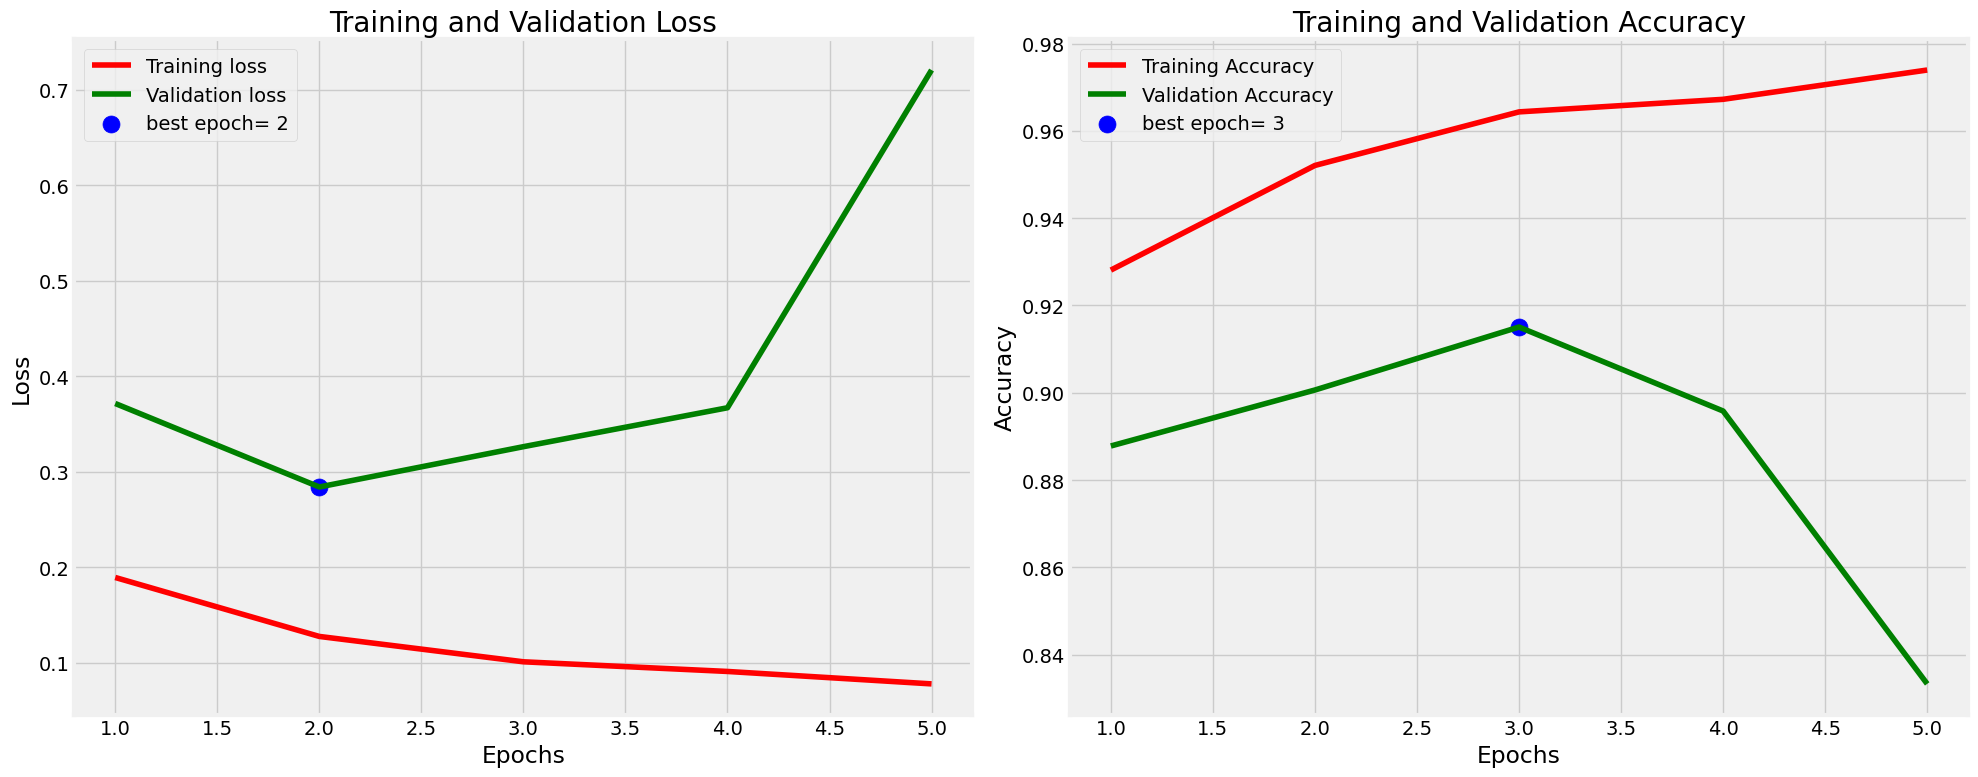

In [10]:
import numpy as np
import matplotlib.pyplot as plt

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = range(1, len(tr_acc) + 1)
loss_label = f'best epoch= {index_loss + 1}'
acc_label = f'best epoch= {index_acc + 1}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


58889256/58889256 [==============================] - 1s 0us/step
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 3920s 23s/step - loss: 0.1895 - accuracy: 0.9281 - val_loss: 0.3716 - val_accuracy: 0.8878
Epoch 2/5
163/163 [==============================] - 3791s 23s/step - loss: 0.1278 - accuracy: 0.9521 - val_loss: 0.2842 - val_accuracy: 0.9006
Epoch 3/5
163/163 [==============================] - 3764s 23s/step - loss: 0.1012 - accuracy: 0.9643 - val_loss: 0.3264 - val_accuracy: 0.9151
Epoch 4/5
163/163 [==============================] - 3648s 22s/step - loss: 0.0911 - accuracy: 0.9672 - val_loss: 0.3671 - val_accuracy: 0.8958
Epoch 5/5
163/163 [==============================] - 3515s 22s/step - loss: 0.0781 - accuracy: 0.9739 - val_loss: 0.7205 - val_accuracy: 0.8333


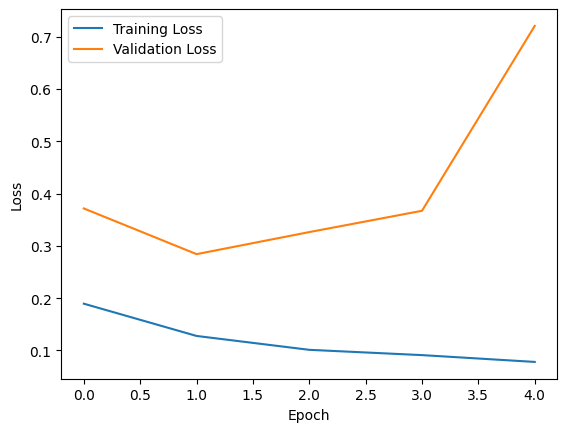

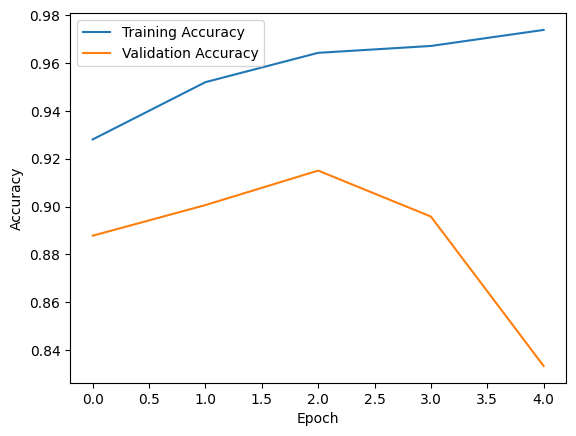

In [2]:
# Compile the model
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Define data directories
train_dir = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train'
test_dir = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/test'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create TensorFlow datasets for efficient data loading and processing
batch_size = 32
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Train the model with optimized data loading and processing
history = final_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
final_model.save('/content/drive/MyDrive/Machine Learning/Project/our_model.h5')

In [9]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the model with the full path
model = load_model('/content/drive/MyDrive/Machine Learning/Project/our_model.h5')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/Machine Learning/Project/sample_images/NORMAL2-IM-1430-0001.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_data = preprocess_input(img_array)

# Make predictions
prediction = model.predict(img_data)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

# Define class labels
class_labels = ['Normal', 'Pneumonia']

# Print the prediction result
if predicted_class == 0:
    print('Person is not affected.')
else:
    print('Person is affected with Pneumonia.')

# Print the confidence level
print(f'Confidence: {prediction[0][predicted_class]}')

# Print all class probabilities
for i, prob in enumerate(prediction[0]):
    print(f'{class_labels[i]}: {prob}')


1/1 [==============================] - 1s 1s/step
Person is affected with Pneumonia.
Confidence: 1.0
Normal: 2.586419908932085e-24
Pneumonia: 1.0


##CAPSTON - 2
STATISTICS